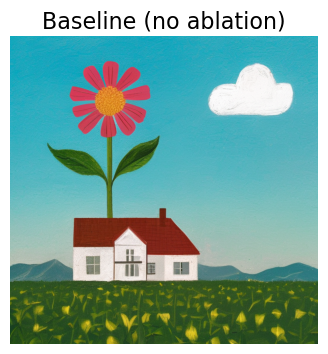

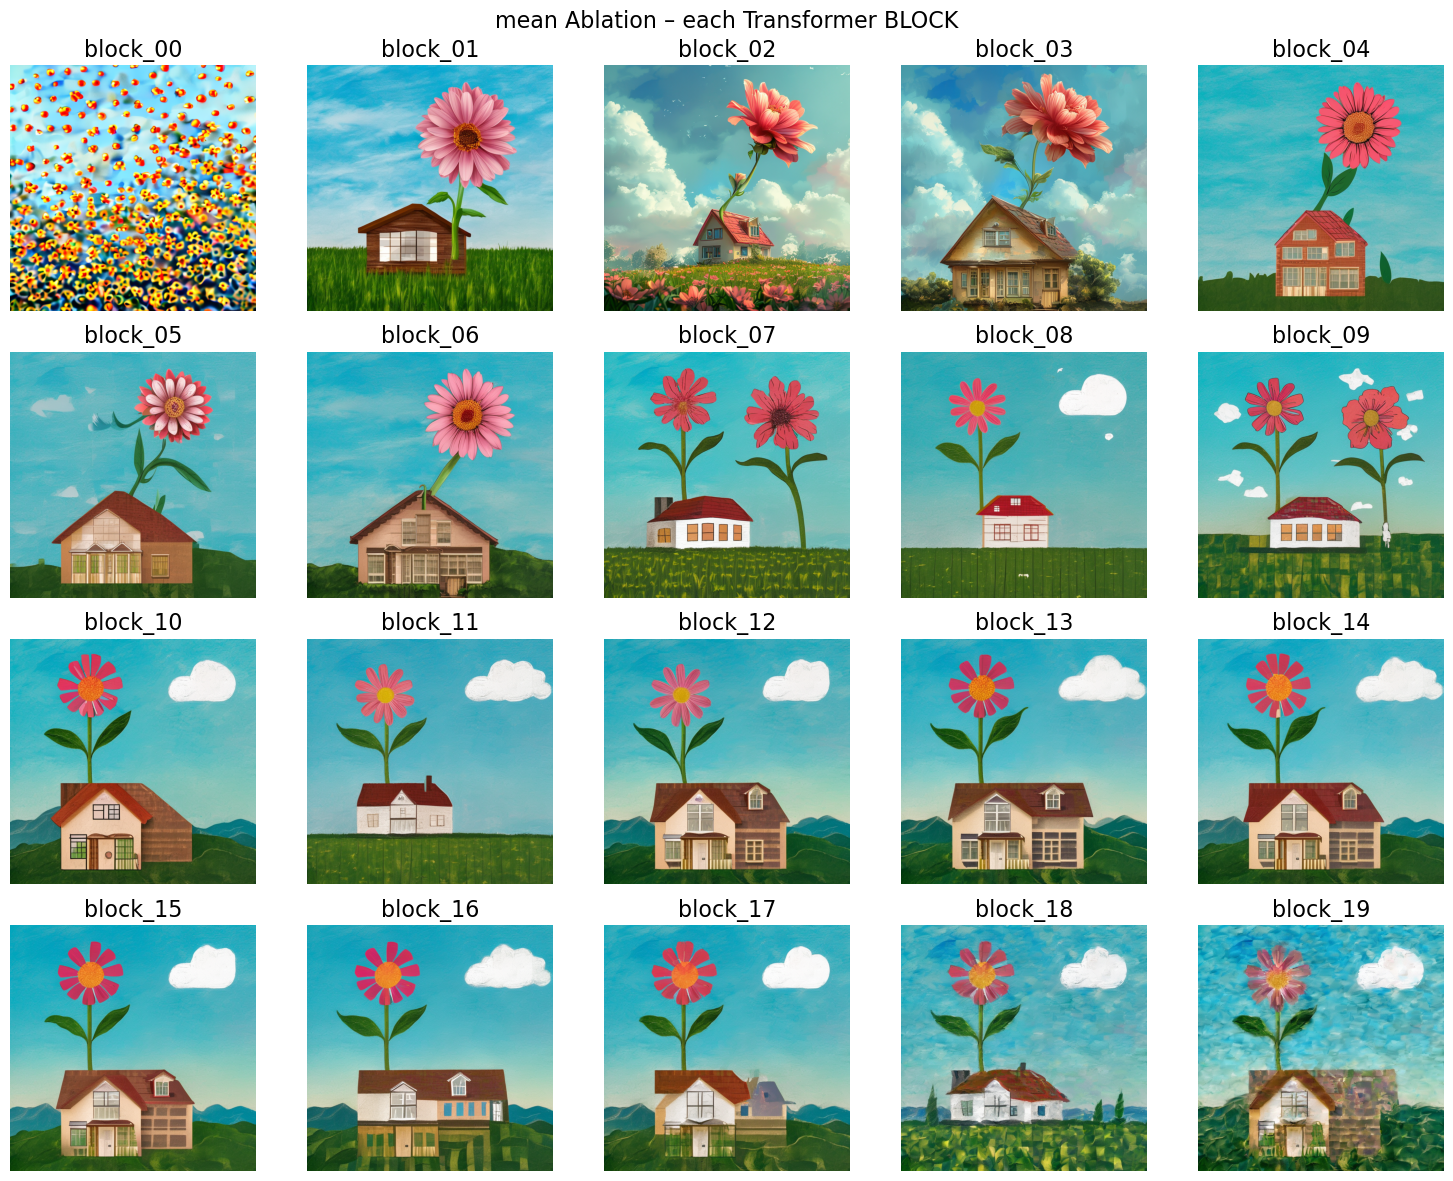

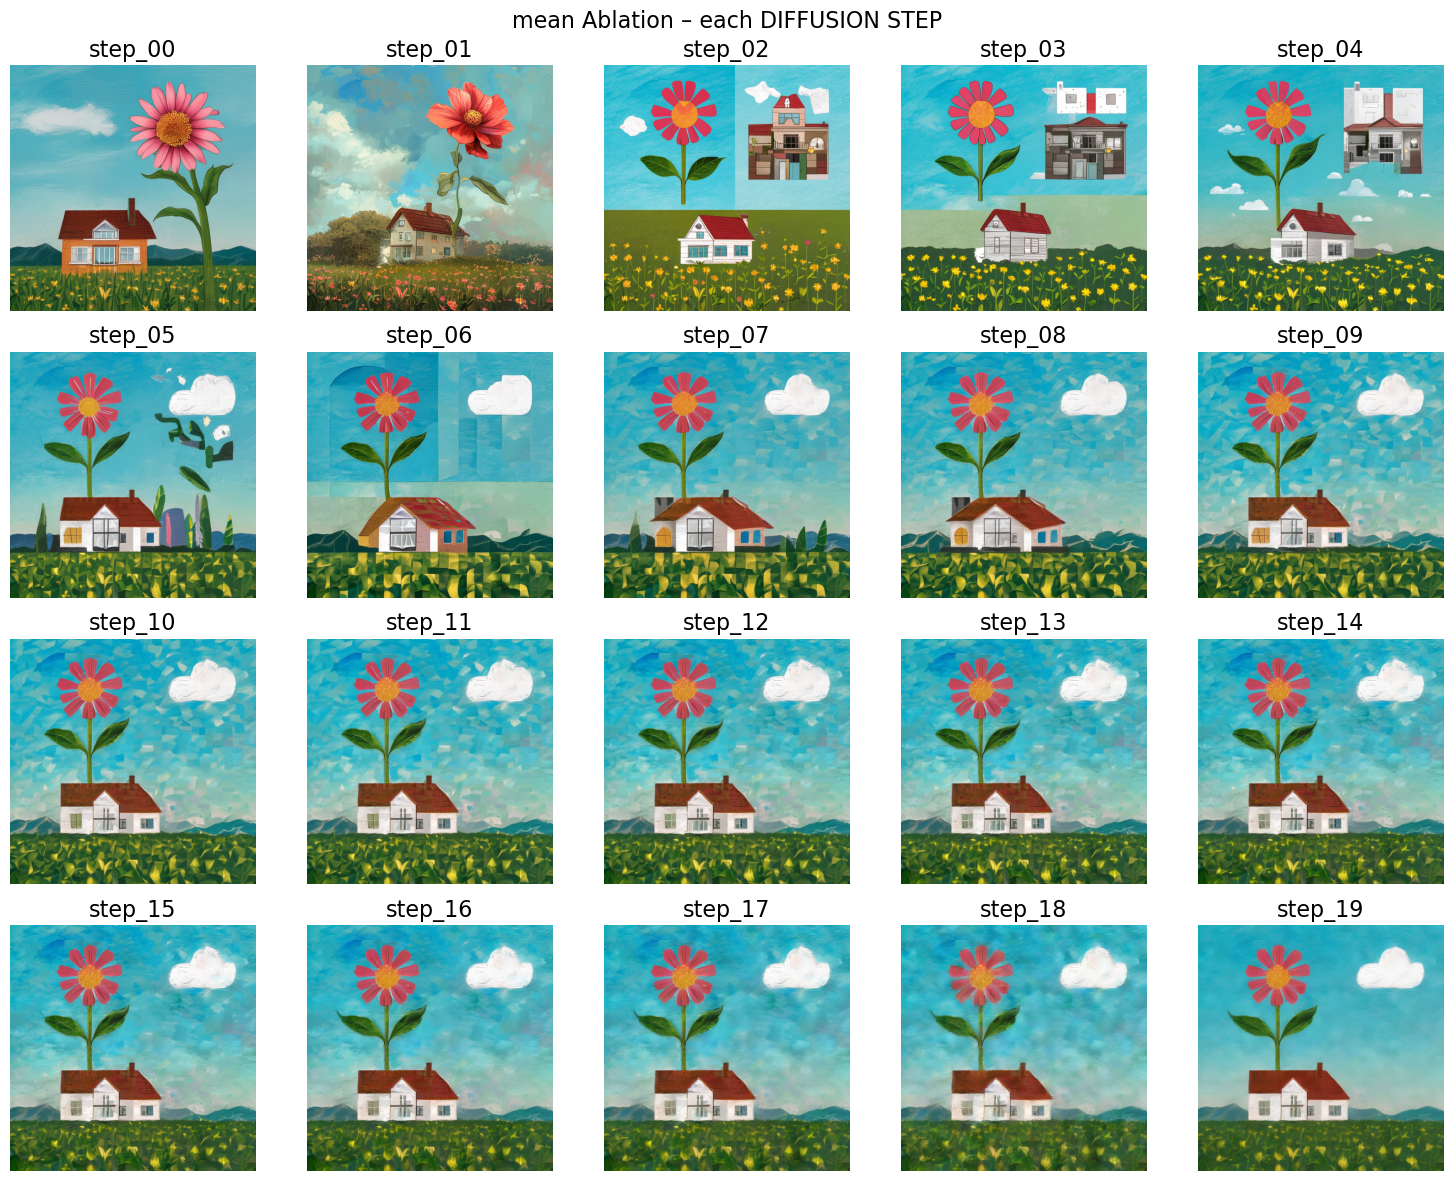

In [9]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import math

# -------------------------------------------------------------------
# 1)  Point this to your “sana_ablation_results” root
# -------------------------------------------------------------------
PARENT = Path("sana_ablation_results_flower, house, sky")   # <-- change if needed
EXP_NAME = "mean"                        # we visualise the ZERO-ablation run

STEP_DIR   = PARENT / f"step_{EXP_NAME}"
BLOCK_DIR  = PARENT / f"block_{EXP_NAME}"
baseline_p = STEP_DIR / "baseline.png"   # baseline was copied to every folder

# -------------------------------------------------------------------
# 2)  Helpers
# -------------------------------------------------------------------
def smart_grid(n_items, n_cols=5):
    cols = n_cols
    rows = math.ceil(n_items / cols)
    return rows, cols

def show_grid(img_paths, title, n_cols=5, size=3):
    rows, cols = smart_grid(len(img_paths), n_cols)
    fig, axes = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    axes = axes.flatten()

    for ax, p in zip(axes, img_paths):
        ax.imshow(Image.open(p))
        ax.set_title(p.stem, fontsize=16)
        ax.axis("off")

    for ax in axes[len(img_paths):]:
        ax.axis("off")

    fig.suptitle(title, fontsize=16)
    fig.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# 3)  Baseline
# -------------------------------------------------------------------
plt.figure(figsize=(4,4))
plt.imshow(Image.open(baseline_p))
plt.title("Baseline (no ablation)",fontsize=16)
plt.axis("off")
plt.show()

# -------------------------------------------------------------------
# 4)  Zero-ablation grids
# -------------------------------------------------------------------
block_imgs = sorted(BLOCK_DIR.glob("block_*.png"))
show_grid(block_imgs, title=f"{EXP_NAME} Ablation – each Transformer BLOCK")

step_imgs = sorted(STEP_DIR.glob("step_*.png"))
show_grid(step_imgs, title=f"{EXP_NAME} Ablation – each DIFFUSION STEP")
